# Basics of Operator Learning

This example demonstrates the basics of neural operators in Continuity,
including how to train it on a given operator.

In [1]:
import torch
import matplotlib.pyplot as plt
from continuity.operators import DeepONet

In [2]:
torch.manual_seed(0)
plt.rcParams["axes.facecolor"] = (1, 1, 1, 0)
plt.rcParams["figure.facecolor"] = (1, 1, 1, 0)
plt.rcParams["legend.framealpha"] = 0.0


## Problem Statement

Let's assume we want to learn the derivative operator $G: u \mapsto \partial_x u$.
We choose (as an example) the function $u$ that maps to its derivative $v$
$$
u(x) = \sin(x) \to \cos(y) = v(y)
$$
on the interval $[-\pi, \pi]$.

Let's start with defining and plotting input and target function!

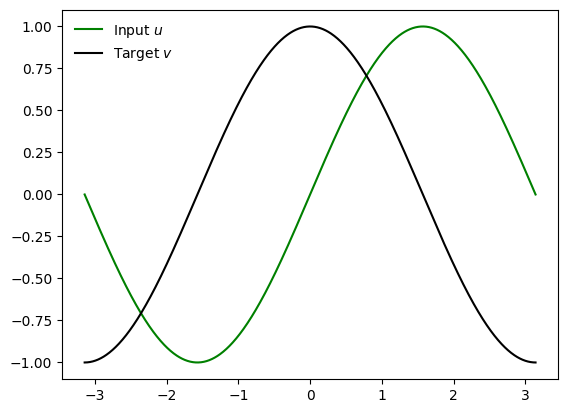

In [3]:
# Input function (some example)
u = lambda x: torch.sin(x)

# Target function (the derivative of u)
v = lambda y: torch.cos(y)

# Plot input and target function
L = torch.pi
x = torch.linspace(-L, L, 1000)
plt.plot(x, u(x), "g-", label="Input $u$")
plt.plot(x, v(x), "k-", label="Target $v$")
plt.legend()
plt.show()

## Neural Operator

In order to approximate the operator $G$ from above with a neural network,
we set up a neural operator.
A neural operator takes an input function $u$ evaluated at sensor positions $x$
and maps it to a function $v$ evaluated at (different) evaluation positions $y$:
$$
v(y) = \operatorname{Operator}\left(x, u(x)\right)(y).
$$
In this example, we choose the DeepONet architecture with 32 sensors.

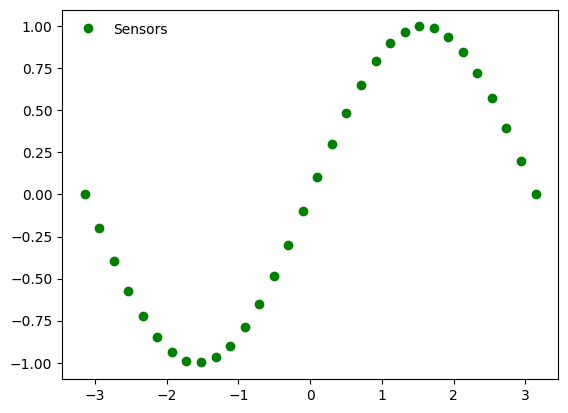

In [4]:
num_sensors = 32

# Define operator
operator = DeepONet(num_sensors)

# Some sensor positions
x = torch.linspace(-L, L, num_sensors)

# Plot sensors
plt.plot(x, u(x), "go", label="Sensors")
plt.legend()
plt.show()

## Evaluating a Neural Operator

Before we train the neural operator, let us show how to evaluate the (untrained)
neural operator and plot the result.

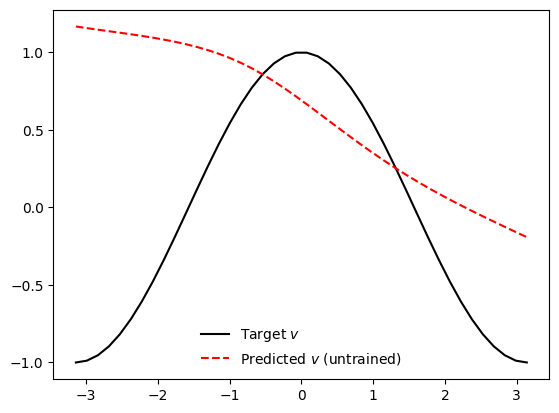

In [5]:
# Some (different) evaluation positions
y = torch.linspace(-L, L, 42)

# Call operator
v_pred = operator(x, u(x), y)

# Plot the predicted function
v_pred = v_pred.reshape(y.shape).detach()
plt.plot(y, v(y), "k-", label="Target $v$")
plt.plot(y, v_pred, "r--", label="Predicted $v$ (untrained)")
plt.legend()
plt.show()

## Training

Now, let's train the neural operator!

We define a corresponding data set, i.e., a list-like of input-output samples.

In [6]:
# Dataset containing single sample
dataset = [(x, u(x), y, v(y))]

Using Adam we train the neural operator for 1000 epochs. 

In [7]:
optimizer = torch.optim.Adam(operator.parameters(), lr=1e-3)
operator.compile(optimizer)
operator.fit(dataset, epochs=1000)

Model parameters: 7984
Epoch 1000:  loss = 1.5345e-04  (924.06 it/s)


## Evaluating the trained operator

The trained operator can be evaluated at arbitrary positions, so let's plot a
fine resolution of the mapping along with the target function.

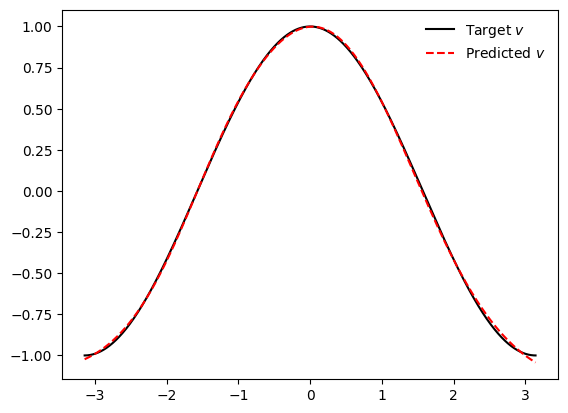

In [8]:
# Use a fine equidistant grid
y = torch.linspace(-L, L, 1000)

# Call operator with more points
v_pred = operator(x, u(x), y)

# Plot output and target function
v_pred = v_pred.reshape(y.shape).detach()
plt.plot(y, v(y), "k-", label="Target $v$")
plt.plot(y, v_pred, "r--", label="Predicted $v$")
plt.legend()
plt.show()

That's the basics!